# An individual household electric power consumption

## Objectives
This study has as an objective to predict eletrical consumption based on the available data. More specifically how the reactive power consumption is increasing/decreasing with the time, and which of the mapped areas wastes more energy (considering the kitchen, the laundry room and the water-heater + air-conditioner)

## About the Data

### Origin
The data was downloaded from the UCI Machine Learning Repository (link in the references). It contains "measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months)."


 
### Business Problem

While billing for residences is usually done considering only the active power (Watts), households can also consumes reactive power (also known as the useless power) from the energy grid. Usually the amount of reactive power consumed from the grid is only a fraction of the active power (less than 5% in most cases), so the power distribution company do not have to worry about it.  But how it´s changing over the years? Today we have more eletronics with capacitors, induction heating systems and even wireless power transfers, all of those needing more reactive energy.

This study will look at the consumption of this single household over the years to try to understand if there is any trend in it´s consumption and if it´s necessary to change the billing system to account for the reactive power or not. 


### Volume of Data
This dataset contains 2.075.259 measurements, for 47 months between December 2006 and November 2010


### Data Dictionary
    1.date: Date in format dd/mm/yyyy  
    2.time: time in format hh:mm:ss
    3.global_active_power: household global minute-averaged active power (in kilowatt)
    4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) *Note*: We are assuming that´s in kVAR instead of kW
    5.voltage: minute-averaged voltage (in volt)
    6.global_intensity: household global minute-averaged current intensity (in ampere)
    7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
    8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
    9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

Notes  
    1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.  
    2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

### Assumptions

Since kilowatts are NOT used to represent reactive power, we are assuming that the unit of global_reactive_power is kVAR.


## References
Original data available at:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

About Active and Reactive Power
https://aperc.gov.in/admin/upload/151340198613587660935a34ae822cf4c.pdf

https://www.electricaltechnology.org/2019/08/difference-between-active-and-reactive-power.html

https://www.allaboutcircuits.com/textbook/alternating-current/chpt-11/true-reactive-and-apparent-power/

https://en.wikipedia.org/wiki/AC_power

https://integratedelectronics.blog/knowledge-base/why-there-is-no-reactive-power-in-dc/

https://www.fluke.com/en-us/learn/blog/power-quality/power-factor-formula

## EDA

In [237]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv("data/household_power_consumption.txt", sep = ";")

C:\Users\CooperMind\AppData\Local\Temp\ipykernel_18800\625677678.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/household_power_consumption.txt", sep = ";")


In [3]:
# Checking if we got what we expected
print(df.shape ==  (2075259, 9))
df.head()

True


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
# Note that most of the columns are read as strings:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   object 
 1   time                   object 
 2   global_active_power    object 
 3   global_reactive_power  object 
 4   voltage                object 
 5   global_intensity       object 
 6   sub_metering_1         object 
 7   sub_metering_2         object 
 8   sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [464]:
# Let´s reload the data with the correct types:
# Note that we could not read some of the float columnas as float because of the "?" character. I Just added them as na_values
numeric_types = {    "Global_active_power": "float",
    "Global_reactive_power": "float",
    "Voltage": "float",
    "Global_intensity": "float",
    "Sub_metering_1": "float",
    "Sub_metering_2": "float",
    "Sub_metering_3": "float"}

df = pd.read_csv("data/household_power_consumption.txt", sep = ";",
                parse_dates={'timestamp' : ['Date', 'Time']}, infer_datetime_format=True, 
                dtype=numeric_types, na_values="?")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   timestamp              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [465]:
# Fix column names
df.columns = df.columns.str.lower()

# Get meaningfull names
def with_meaningfull_names(df):
    return df.rename(columns = {"sub_metering_1": "sub_metering_1_kitchen","sub_metering_2": "sub_metering_2_laundry", "sub_metering_3": "sub_metering_3_water_heater_air_conditioner"})

## NA Analysis
Fist, let´s see how much NAs we have in the dataset.

In [363]:
df.isna().mean()


timestamp                0.000000
global_active_power      0.012518
global_reactive_power    0.012518
voltage                  0.012518
global_intensity         0.012518
sub_metering_1           0.012518
sub_metering_2           0.012518
sub_metering_3           0.012518
dtype: float64

In [364]:
# Number of different fields with missings
pd.DataFrame({"MissingFields": df.isna().sum(axis=1).value_counts(),
              "PCT": np.round(100*df.isna().sum(axis=1).value_counts()/df.shape[0], 2)})


,MissingFields,PCT
0,2049280,98.75
7,25979,1.25


As stated by the data provider, only 1.25% of the data contains missings. And know we know that if one of the fields is missing, every other is also missing. Let´s see if they are concentrated in one date or if they are distributed in the dataframe. 

<AxesSubplot:xlabel='timestamp'>

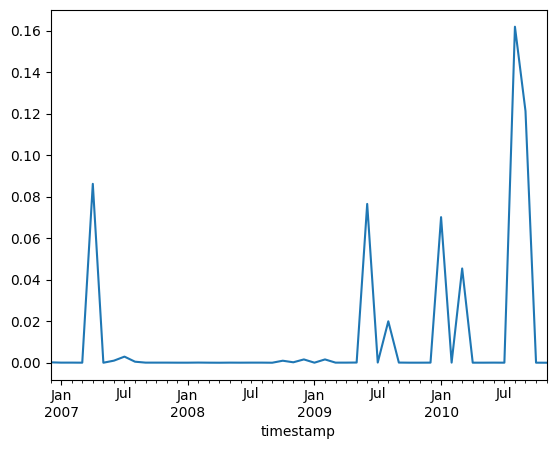

In [366]:
df.set_index('timestamp').resample("M")["voltage"].agg(lambda c: c.isna().mean()).plot()

There is no unique period of time with all the missings, and there seems to be a pattern of when they happen. 

In most of the cases, we have less than 8% of missings in every months, with the exception of Aug/2010 and Sep/2010. 

For this analysis we will remove those cases from the dataset instead of trying to fill them., even tough some months have up to 16% of the observations as missings. 



In [466]:
df = df.dropna()
df.isna().mean()

timestamp                0.0
global_active_power      0.0
global_reactive_power    0.0
voltage                  0.0
global_intensity         0.0
sub_metering_1           0.0
sub_metering_2           0.0
sub_metering_3           0.0
dtype: float64

## See if the values make sense


In [467]:
with_meaningfull_names(df).describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1_kitchen,sub_metering_2_laundry,sub_metering_3_water_heater_air_conditioner
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00


## Evaluating Power Factor and other features

The power factor is the ratio Active Power / Apparent Power. For households it´s usually over 90%, meaning that most of the energy consumed in the house comes from energy actually used, and only 10% is wasted energy. If those ratios are still constant, there is no need to change the billing methodology. 

If those ratios are decreasing, however, we need to start taking into account the reactive power to calculate the billings.
  
  
<div>
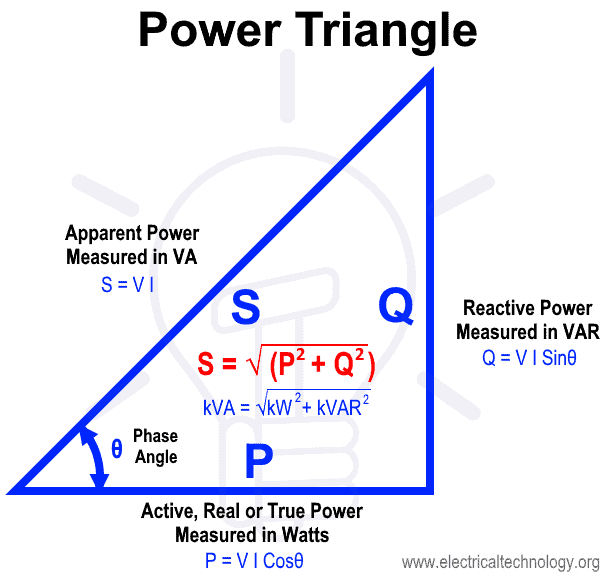
</div>




In [649]:
def add_power_factor(df):
    df = df.copy()            
    # The apparent power can be calculated using pitagoras
    df["apparent_power"] = np.sqrt(np.power(df["global_active_power"], 2) + np.power(df["global_reactive_power"],2))
    
    # The power factor is defined as Active Power / Apparent Power. 
    df["power_factor"] = 100*df["global_active_power"]/df["apparent_power"]
    return(df)


    

def add_features(df):
    df = df.copy()
    
    minutes_column = "minutes"
    if not minutes_column in df.columns:
        # Should have no columns with NAs at this point, but if we have, we won't count the minutes for those observations
        df['minutes'] = np.where(df["voltage"].isna(), 0, 1)
    
    # Using minutes_column allows the formula to also work in the aggregated data
    # minutes_column is equal to 1 for the non aggregated data
    df["not_measured_active_consumption"] = np.maximum(0, (1000*df["global_active_power"]*df[minutes_column]/60) - df["sub_metering_1"] - df["sub_metering_2"] - df["sub_metering_3"])
    
    return add_power_factor(df)

df = add_features(df)
df.describe().round(2)

KeyboardInterrupt: 

In [477]:
(100*(df.power_factor < 90).mean()).round(2)

13.55

Most of the observations in the dataset have the Power Factor over 95%, which is pretty high. 
And only 13% of the measures have a power factor of less than 90%, which is good.

If those measures are not concentrated at the latest months, them the current billing system should still be good enough.



In [480]:
def aggregate_data(agg_df):
    ''' This aggregation takes care to correctly deal with the aggregation of the variables:
        global_active_power
        global_reactive_power
        voltages
        global_intensity
        
        Those variables are all averages by minute. 
        
        To keep their definition in the aggregation, we need to average them by the time. 
    '''
    sum_df = agg_df.sum()
    variables_mean_by_minute = ['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity']
    sum_df[variables_mean_by_minute] = sum_df[variables_mean_by_minute].divide(sum_df["minutes"], axis=0)
    return add_features(sum_df)
   

<AxesSubplot:xlabel='timestamp'>

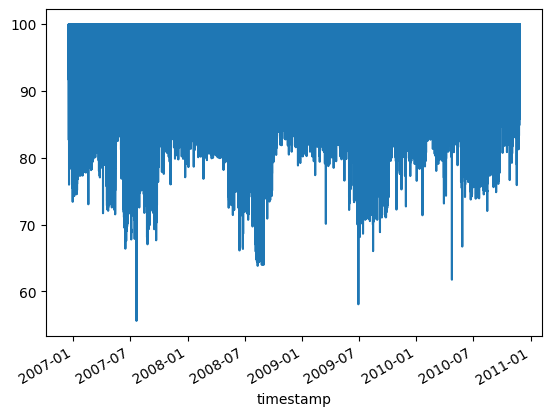

In [501]:
df.set_index("timestamp").power_factor.plot()

<AxesSubplot:xlabel='timestamp'>

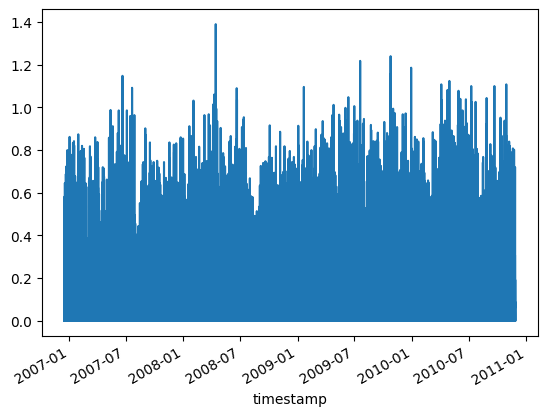

In [547]:
df.set_index("timestamp").global_reactive_power.plot()

Since the power level measures will depends a lot of which equipament is being used, it does not make sense to analyse it purely on the minute level. Let´s aggregate the data and do an analysis closer to what is interesting for an energy company:

In [502]:
month_agg = df.set_index("timestamp").resample("M")
day_agg  = df.set_index("timestamp").resample("D")

day_df = aggregate_data(day_agg)
month_df = aggregate_data(month_agg)


How the aggregation will affects our variables?

It will lower the global_active_power, the global_reactive_power, the voltage and the global intensity maximums and increase their minimums, since those values are averages per minute.

It also increases the sub_metering and the not measured active values, since those values are measures of accumulated energy in the mounth. 

The power factors are stabilized with the aggregation, with a reduced variance. 

In [503]:
df.describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,minutes,apparent_power,power_factor,not_measured_active_consumption
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.0,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46,1.0,1.11,96.37,9.31
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44,0.0,1.05,5.81,9.59
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00,1.0,0.08,55.59,0.00
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00,1.0,0.33,95.20,3.80
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00,1.0,0.63,99.34,5.50
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00,1.0,1.54,99.97,10.37
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00,1.0,11.12,100.00,124.83


In [504]:
day_df.describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,minutes,apparent_power,power_factor,not_measured_active_consumption
count,1433.00,1433.00,1433.00,1433.00,1442.00,1442.00,1442.00,1442.00,1433.00,1433.00,1433.00
mean,1.09,0.12,240.84,4.63,1594.41,1845.38,9178.34,1421.14,1.10,98.71,13320.60
std,0.42,0.03,2.05,1.74,1587.84,2089.59,3787.90,151.90,0.42,2.27,6150.53
min,0.17,0.06,231.09,0.81,0.00,0.00,0.00,0.00,0.21,83.26,152.97
25%,0.82,0.10,240.09,3.50,555.50,424.25,6604.25,1440.00,0.83,98.76,9261.40
50%,1.08,0.12,240.97,4.56,1109.00,678.50,9251.00,1440.00,1.09,99.39,12577.80
75%,1.32,0.14,241.88,5.54,2196.75,2712.75,11708.50,1440.00,1.33,99.66,16498.83
max,3.31,0.29,247.44,14.03,11178.00,12109.00,23743.00,1440.00,3.32,99.96,61736.43


In [505]:
month_df.describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,minutes,apparent_power,power_factor,not_measured_active_consumption
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00
mean,1.10,0.12,240.85,4.66,47898.65,55438.15,275732.65,42693.33,1.11,98.97,397675.31
std,0.30,0.02,1.56,1.22,15409.62,16724.15,68107.52,3678.92,0.29,1.44,133588.51
min,0.28,0.09,235.18,1.26,3873.00,22264.00,79665.00,21992.00,0.30,90.77,99896.00
25%,0.97,0.11,240.36,4.14,41606.50,44546.50,228893.00,43021.00,0.97,98.88,292970.78
50%,1.12,0.12,240.88,4.71,48153.00,53540.00,290232.00,43474.50,1.13,99.39,398091.30
75%,1.28,0.13,241.74,5.36,57867.50,63737.75,317839.75,44638.00,1.29,99.65,473983.82
max,1.90,0.19,244.08,8.03,75737.00,104762.00,411714.00,44640.00,1.91,99.82,690625.50


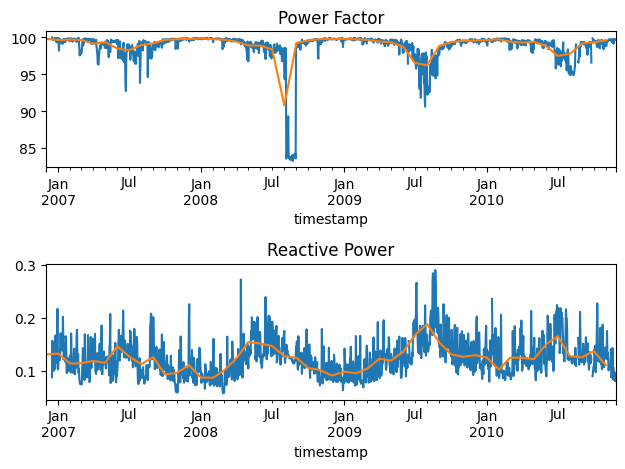

In [517]:
# Now let´s see the power factor variations 
plt.subplot(2,1,1)
day_df.power_factor.plot()
month_df.power_factor.plot()
plt.title("Power Factor")
plt.subplot(2,1,2)
# And also the reactive power variations 
day_df.global_reactive_power.plot()
month_df.global_reactive_power.plot()
plt.title("Reactive Power")
plt.tight_layout()

In [ ]:
# Now let´s see the power factor variations 
plt.subplot(2,1,1)
day_df.global_reactive_power.plot()
month_df.global_reactive_power.plot()
plt.title("Global Active Power")
plt.subplot(2,1,2)
# And also the reactive power variations 
day_df.apparent_power.plot()
month_df.apparent_power.plot()
plt.title("Apparent Power")
plt.tight_layout()

Altough we can see a pattern in the Power Factor, it does not seems to be becoming worse with the years. On contraty, the power factors in July/2010 are higher than those in Jul/2009, which is good. We also can note that the Power Factor are lowest in the summer and higher in the winter, which makes sense.


**Alert**:
Note that something happened between Jul/2009 and Oct/2009 which caused a massive drop in the Power Factor. This dropped in levels below what is even seen in some industries with a lot of motors and inductor heaters, which is **very** strange.

Let´s look at the other variables in the dataset to see if we see something strange:

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

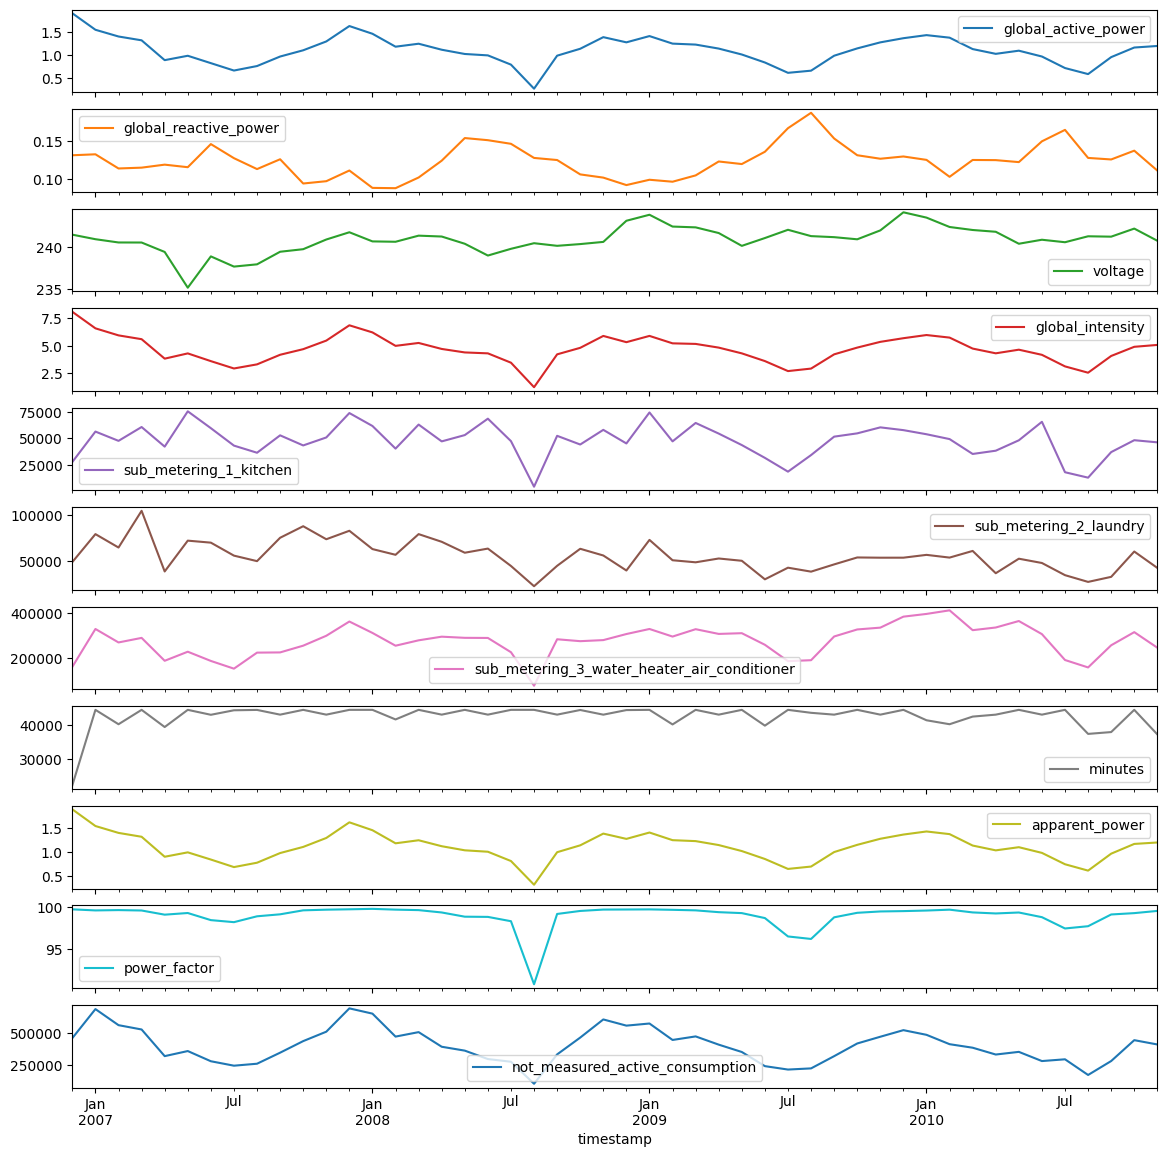

In [518]:
with_meaningfull_names(month_df).plot(subplots=True, figsize=(14,14))

We see that we have the lowest measures for all the sub meters and for the global active power, but usually around those months, every year, we see a drop in the global active power, and the reactive power sometimes stay the same, and sometimes even increase. Altough we see a big drop in the power factor, we cannot be sure that this is some problem in the data or if it´s normal behaviour. 

Also note that the global reactive power do not have big changes, and it´s not the power factor, but the usage of reactive power that´s bad for the power grid. 


But let´s see how the global active power behavied on the months from Aug/2008 to Sep/2008


Looking at a 'zoomed' version of those plots (below), we that there is a pattern of some days with extremely low active power between August and September. Maybe on those days only equipments with requires high reactive power are used and the fact that in 2008 there where more of those days is what brought down the power factor of this point.



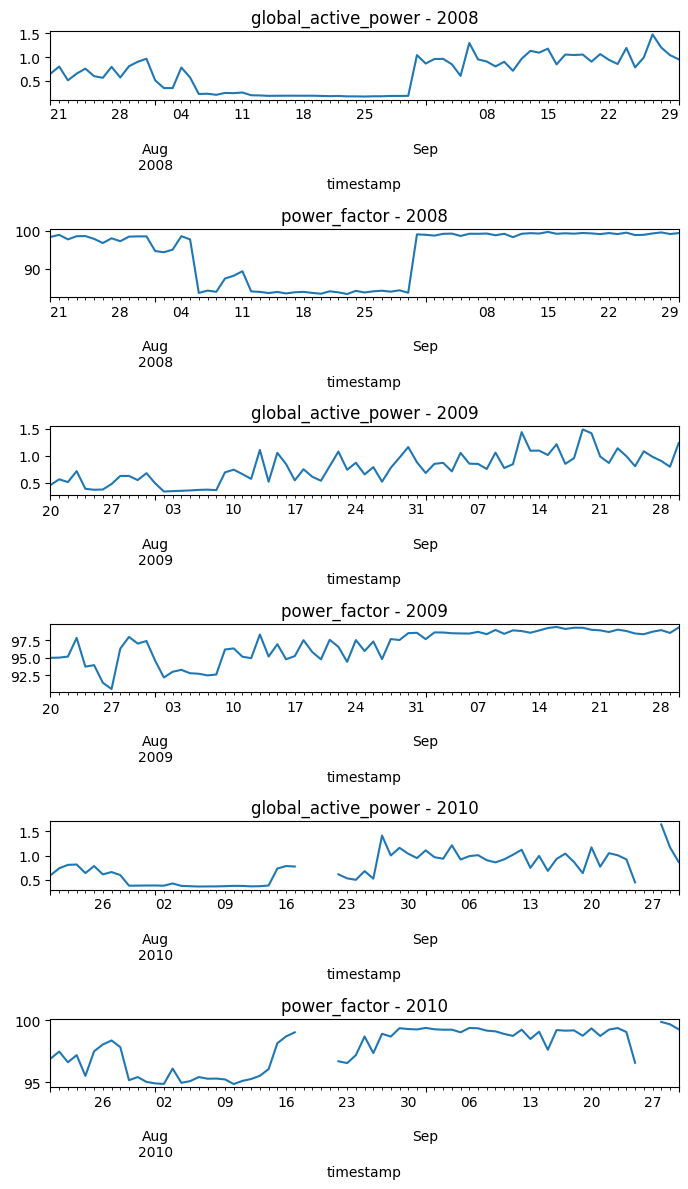

In [541]:

# Zooming in to define the period to be removed
variables = ["global_active_power", "power_factor"]

fig, ax = plt.subplots(6,1, figsize=(7,12))
with_meaningfull_names(day_df).query('index >= "2008/07/20" and index <= "2008/09/30"')[variables[0]].plot(ax=ax[0])
ax[0].set_title(variables[0] +" - 2008")
with_meaningfull_names(day_df).query('index >= "2008/07/20" and index <= "2008/09/30"')[variables[1]].plot(ax=ax[1])
ax[1].set_title(variables[1] +" - 2008")

with_meaningfull_names(day_df).query('index >= "2009/07/20" and index <= "2009/09/30"')[variables[0]].plot(ax=ax[2])
ax[2].set_title(variables[0] +" - 2009")
with_meaningfull_names(day_df).query('index >= "2009/07/20" and index <= "2009/09/30"')[variables[1]].plot(ax=ax[3])
ax[3].set_title(variables[1] +" - 2009")

with_meaningfull_names(day_df).query('index >= "2010/07/20" and index <= "2010/09/30"')[variables[0]].plot(ax=ax[4])
ax[4].set_title(variables[0] +" - 2010")
with_meaningfull_names(day_df).query('index >= "2010/07/20" and index <= "2010/09/30"')[variables[1]].plot(ax=ax[5])
ax[5].set_title(variables[1] +" - 2010")
plt.tight_layout()

### Correlation Analysis

Now lets try to asses the bigest 'pain points' when we are talking about Reactive Power. Or which conditions leads to a lower Power Factor. 

My first hipotesis would be that the use of air conditioner and washing machine should rise the reactive power and decrease the power factor (mostly in the summer), while the use of water heater and oven should increase the active power and increase the power factor.
Note that we can only know the usage of Active Power in each of the 3 sub measures, so we cannot be sure of what's being used or not. 



In [571]:
# Since the use of air conditioner and water heater should be related to the 4 seasons, I´m splitting this dataset in 4:
month_df["season"] =  month_df.index.month.map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})

winter_df = month_df[month_df["season"] == 1]
spring_df = month_df[month_df["season"] == 2]
summer_df = month_df[month_df["season"] == 3]
fall_df   = month_df[month_df["season"] == 4]


In [572]:
def calculate_corr(df, plot=False):
    columns_cor = ['power_factor', 'global_reactive_power', 'global_active_power', 
        'sub_metering_1_kitchen', 'sub_metering_2_laundry',
        'not_measured_active_consumption',
       'sub_metering_3_water_heater_air_conditioner']
    correlations = with_meaningfull_names(df)[columns_cor].corr()
    return correlations


In [574]:
# Months Correlation
c_all = calculate_corr(month_df)
c_winter = calculate_corr(winter_df)
c_spring = calculate_corr(spring_df)
c_summer = calculate_corr(summer_df)
c_fall = calculate_corr(fall_df)
all_correlations_power_factor = pd.concat([ x[["power_factor"]] for x in [c_all, c_winter, c_spring, c_summer, c_fall]], axis=1)
all_correlations_reactive_power = pd.concat([ x[["global_reactive_power"]] for x in [c_all, c_winter, c_spring, c_summer, c_fall]], axis=1)
all_correlations_power_factor.columns = ["PF - "+n for n in ["All", "Winter","Spring","Summer","Fall"]]
all_correlations_reactive_power.columns = ["RP - "+n for n in ["All", "Winter","Spring","Summer","Fall"]]

In [577]:
print("Correlations with Reactive Power - Month")
display(all_correlations_reactive_power.multiply(100).round(2))

Correlations with Reactive Power - Month


,RP - All,RP - Winter,RP - Spring,RP - Summer,RP - Fall
power_factor,-45.80,-64.70,-85.32,-3.39,-88.95
global_reactive_power,100.00,100.00,100.00,100.00,100.00
global_active_power,-49.44,61.73,-43.38,15.54,-51.56
sub_metering_1_kitchen,-28.04,-9.92,-38.89,8.48,17.39
sub_metering_2_laundry,-33.72,19.35,-21.07,3.20,-51.19
not_measured_active_consumption,-58.46,7.41,-52.99,25.08,-60.29
sub_metering_3_water_heater_air_conditioner,-30.44,3.89,8.65,17.68,33.44


Correlations with Reactive Power - Day


,RP - All,RP - Winter,RP - Spring,RP - Summer,RP - Fallday_
power_factor,-22.98,-9.14,-27.74,1.92,-38.29
global_reactive_power,100.00,100.00,100.00,100.00,100.00
global_active_power,3.95,52.41,34.61,34.22,24.98
sub_metering_1_kitchen,31.45,48.23,42.44,33.47,44.94
sub_metering_2_laundry,17.86,39.36,24.38,17.04,20.17
not_measured_active_consumption,-10.55,35.06,13.65,30.92,-0.77
sub_metering_3_water_heater_air_conditioner,2.41,25.06,22.16,18.76,28.57


Correlations with Reactive Power - Minutes


,RP - All,RP - Winter,RP - Spring,RP - Summer,RP - Fallday
power_factor,-44.15,-40.78,-47.31,-46.22,-43.21
global_reactive_power,100.00,100.00,100.00,100.00,100.00
global_active_power,24.70,30.57,27.76,29.93,27.58
sub_metering_1_kitchen,12.31,13.47,13.66,12.23,11.87
sub_metering_2_laundry,13.92,17.16,14.13,12.99,13.74
not_measured_active_consumption,21.16,27.24,25.38,31.49,24.95
sub_metering_3_water_heater_air_conditioner,8.96,9.20,9.70,13.18,10.95


Interesting. The active energy not measured on the sub meterings are the ones that most "strongly" correlates with the reactive energy. It´s mostly a negative correlation, meaning that the greater amounts of non measured actived energy are associated with lesser reactive power, except in the Summer, when it has the strongest relationship in this season, and it´s positive.

Considering the whole year, the correlation between the reactive power and the active power is (altough weak) always negative, meaning that an increase of the use of more active power is  associated with less wasted power. 

In the Winter, the two kind of power are more independent of each other. The strongest correlation is between the laundry and the global reactive power, and it´s positive.

In the Spring, we see the same tendencies as the whole year, except by the sub_metering_3, that slight positive.

In the Summer we see a stronger positive relationship between the active power not measured and the global reactive power, and some relationshib with the sub_metering_3. 

In the Fall we see the "strongest negative corrrelation (-60%) and also the strongest correlation of the sub_metering_3 (and positive).

In [579]:
print("Correlations with Power Factor - Month")
display(all_correlations_power_factor.multiply(100).round(2))

Correlations with Power Factor - Month


,PF - All,PF - Winter,PF - Spring,PF - Summer,PF - Fall
power_factor,100.00,100.00,100.00,100.00,100.00
global_reactive_power,-45.80,-64.70,-85.32,-3.39,-88.95
global_active_power,73.18,19.52,81.32,87.26,81.06
sub_metering_1_kitchen,61.97,3.92,37.87,65.36,9.48
sub_metering_2_laundry,47.92,5.27,46.91,56.84,43.81
not_measured_active_consumption,65.08,15.81,79.07,83.09,83.36
sub_metering_3_water_heater_air_conditioner,65.07,-39.02,27.44,75.55,2.29


Correlations with Power Factor - Day


,PF - All,PF - Winter,PF - Spring,PF - Summer,PF - Fall
power_factor,100.00,100.00,100.00,100.00,100.00
global_reactive_power,-22.98,-9.14,-27.74,1.92,-38.29
global_active_power,55.76,57.01,63.47,72.55,65.14
sub_metering_1_kitchen,25.06,22.89,21.50,37.08,19.12
sub_metering_2_laundry,18.55,19.09,25.03,26.72,23.25
not_measured_active_consumption,48.41,46.04,50.28,67.26,63.75
sub_metering_3_water_heater_air_conditioner,49.22,51.00,52.67,64.43,42.87


Correlations with Power Factor - Minutes


,PF - All,PF - Winter,PF - Spring,PF - Summer,PF - Fall
power_factor,100.00,100.00,100.00,100.00,100.00
global_reactive_power,-44.15,-40.78,-47.31,-46.22,-43.21
global_active_power,38.54,36.58,37.10,39.77,38.04
sub_metering_1_kitchen,10.43,9.16,10.70,12.67,10.50
sub_metering_2_laundry,6.30,6.21,6.70,6.31,6.15
not_measured_active_consumption,26.38,24.77,20.82,20.84,25.85
sub_metering_3_water_heater_air_conditioner,38.57,37.89,40.05,42.13,37.87


More interesting tough, is to see that no matter how the active and reactive power usage are correlated individually, the Power Factor are usually positivelly affected with the increase of the active energy for all the active energy meterings, except for the sub_metering_3 in the winter.

This can be explained by the fact that even if the reactive power goes up with the active power, the active power normally increases more than the reactive power.

#### Day Analysis

### Predicting Reactive Power

In [ ]:

test_data = df.query("timestamp >= '2009-09-13'").set_index('timestamp')
train_data     = df.query("timestamp < '2009-09-13'").set_index('timestamp')

In [ ]:
test_data.index.min()

In [694]:
def date_transform(data):
    df = data.copy()
    

    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week.astype('int')
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop(['global_reactive_power', "apparent_power", "minutes"], axis=1)
    y = df['global_reactive_power']
    
    return X, y

train_x, train_y = date_transform(train_data)
train_full = pd.concat([train_x, train_y], axis=1)
test_x, test_y = date_transform(test_data)



The objective of this first model is to better understand how we can infer the reactive power based on the available information of the active power, and not to do forecasts.


In [639]:
import statsmodels.formula.api as smf
model = smf.ols("global_reactive_power ~ global_active_power + voltage + global_intensity + sub_metering_1 + sub_metering_2 + sub_metering_3 + C(season) + Hour + C(Dayofweek) + Dayofmonth + Dayofyear + weekofyear + C(Month) + C(Quarter) + Year", data = train_full)


In [640]:
model_fited = model.fit()
model_fited.summary()

In [647]:
predicted_train_y = model_fited.predict(train_x)
predicted_test_y  = model_fited.predict(test_x)

In [756]:
def prepare_to_plot(X, actual_y, predicted_y, period = None):
    real_df = X.copy()
    #real_df["minute"] = np.where(real_df["voltage"].isna(), 0, 1)
    real_df["minute"] = 1
    if not period:
        pred_df = real_df.copy()
        real_df["global_reactive_power"] = actual_y
        pred_df["global_reactive_power"] = predicted_y

    else:
        real_df = real_df.resample(period).agg("sum")
        pred_df = real_df.copy()
        real_df["global_reactive_power"] = actual_y.resample(period).agg("sum").divide(real_df["minute"], axis = 0)
        pred_df["global_reactive_power"] = predicted_y.resample(period).agg("sum").divide(real_df["minute"], axis = 0)
        if "global_active_power" in real_df.columns:
            real_df["global_active_power"] = real_df["global_active_power"].divide(real_df["minute"], axis=0)
            pred_df["global_active_power"] = pred_df["global_active_power"].divide(real_df["minute"], axis=0)

    if "global_active_power" in real_df.columns:
        real_df = add_power_factor(real_df)
        pred_df = add_power_factor(pred_df)

    return(real_df, pred_df)

def plot_reactive_power(real_df, pred_df):
    if "power_factor" in real_df.columns:
        plt.subplot(2,1,1)
        real_df["global_reactive_power"].plot(c="red")
        pred_df["global_reactive_power"].plot(c="green", linestyle="dotted")
        plt.title("Reactive Energy Power Consumption")

        plt.subplot(2,1,2)
        real_df["power_factor"].plot(c="red")
        pred_df["power_factor"].plot(c="green", linestyle="dotted")
        plt.title("Power Factor")
        plt.tight_layout()
    else:
        real_df["global_reactive_power"].plot(c="red")
        pred_df["global_reactive_power"].plot(c="green", linestyle="dotted")
        plt.title("Reactive Energy Power Consumption")


In [678]:
real_df_train, pred_df_train = prepare_to_plot(train_x, train_y, predicted_train_y, "M")
real_df_test, pred_df_test = prepare_to_plot(test_x, test_y, predicted_test_y, "M")

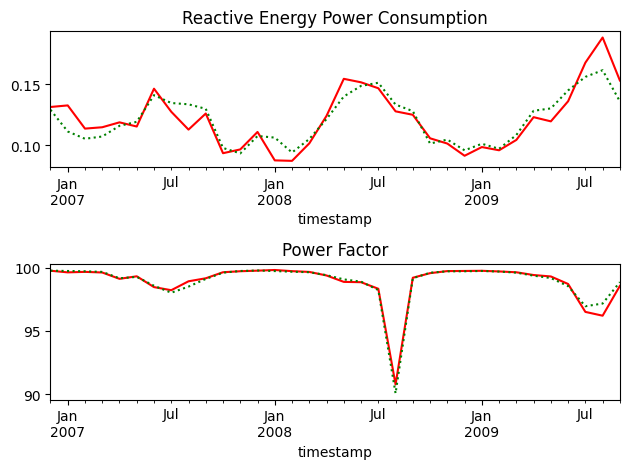

In [679]:
plot_reactive_power(real_df_train, pred_df_train)

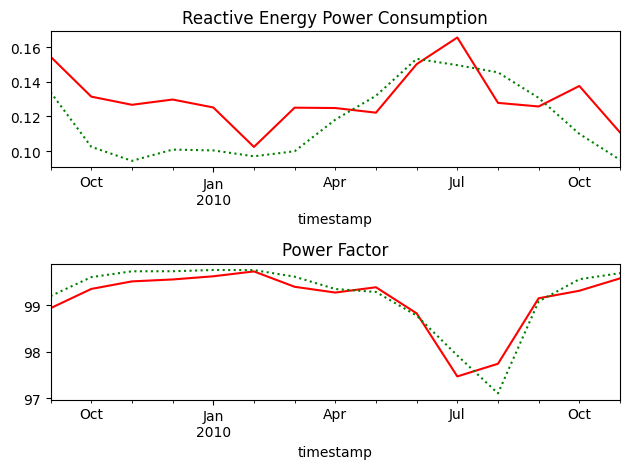

In [680]:
plot_reactive_power(real_df_test, pred_df_test)

Forecast model


In [730]:
forecast_model = smf.ols("global_reactive_power ~ C(season) + Hour + C(Dayofweek) + Dayofmonth + Dayofyear + weekofyear + C(Month) + C(Quarter) + Year", data = train_full).fit()
forecast_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     global_reactive_power   R-squared:                       0.055
Model:                               OLS   Adj. R-squared:                  0.055
Method:                    Least Squares   F-statistic:                     3798.
Date:                   Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                           22:38:31   Log-Likelihood:             1.1578e+06
No. Observations:                1433493   AIC:                        -2.316e+06
Df Residuals:                    1433470   BIC:                        -2.315e+06
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.9817      0.239    -20.823      0.000      -5.451      -4.513
C(season)[T.2]        0.0345      0.009      3.901      0.000       0.017       0.052
C(season)[T.3]        0.0723      0.015      4.684      0.000       0.042       0.103
C(season)[T.4]        0.0664      0.019      3.566      0.000       0.030       0.103
C(Dayofweek)[T.1]     0.0033      0.000      9.750      0.000       0.003       0.004
C(Dayofweek)[T.2]     0.0053      0.000     15.694      0.000       0.005       0.006
C(Dayofweek)[T.3]    -0.0014      0.000     -4.276      0.000      -0.002      -0.001
C(Dayofweek)[T.4]     0.0032      0.000      9.417      0.000       0.003       0.004
C(Dayofweek)[T.5]     0.0266      0.000     78.807      0.000       0.026       0.027
C(Dayofweek)[T.6]     0.0212      0.000     62.638      0.000       0.021       0.022
C(Month)[T.2]         0.0156      0.007      2.372      0.018       0.003       0.028
C(Month)[T.3]         0.0103      0.004      2.783      0.005       0.003       0.018
C(Month)[T.4]        -0.0029      0.001     -4.517      0.000      -0.004      -0.002
C(Month)[T.5]         0.0271      0.006      4.713      0.000       0.016       0.038
C(Month)[T.6]         0.0282      0.006      4.945      0.000       0.017       0.039
C(Month)[T.7]         0.0131      0.002      8.110      0.000       0.010       0.016
C(Month)[T.8]         0.0310      0.008      3.811      0.000       0.015       0.047
C(Month)[T.9]         0.0485      0.012      4.207      0.000       0.026       0.071
C(Month)[T.10]       -0.0020      0.000     -5.095      0.000      -0.003      -0.001
C(Month)[T.11]        0.0199      0.007      2.918      0.004       0.007       0.033
C(Month)[T.12]        0.1188      0.032      3.740      0.000       0.057       0.181
C(Quarter)[T.2]       0.0523      0.011      4.830      0.000       0.031       0.074
C(Quarter)[T.3]       0.0926      0.021      4.355      0.000       0.051       0.134
C(Quarter)[T.4]       0.1367      0.039      3.518      0.000       0.061       0.213
Hour                  0.0023    1.3e-05    173.386      0.000       0.002       0.002
Dayofmonth            0.0007      0.000      3.321      0.001       0.000       0.001
Dayofyear            -0.0008      0.000     -3.827      0.000      -0.001      -0.000
weekofyear            0.0004   2.84e-05     13.117      0.000       0.000       0.000
Year                  0.0025      0.000     21.128      0.000       0.002       0.003
==============================================================================
Omnibus:                   293772.736   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           690467.709
Skew:                           1.157   Prob(JB):            

In [731]:
predicted_train_y = forecast_model.predict(train_x)
predicted_test_y = forecast_model.predict(test_x)


In [735]:
real_df_train, pred_df_train = prepare_to_plot(train_x, train_y, predicted_train_y, "M")
real_df_test, pred_df_test = prepare_to_plot(test_x, test_y, predicted_test_y, "M")


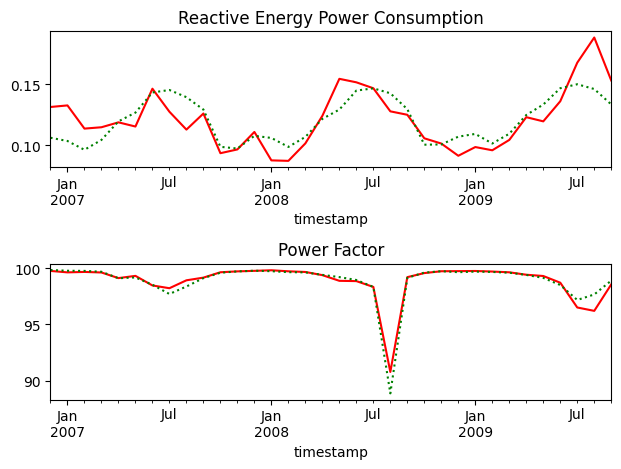

In [736]:
plot_reactive_power(real_df_train, pred_df_train)

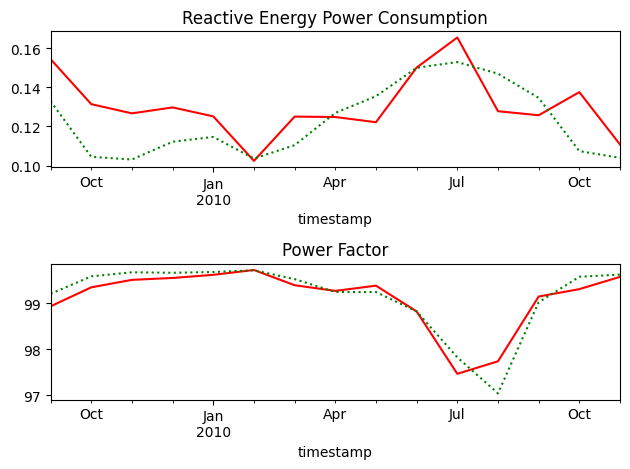

In [739]:
plot_reactive_power(real_df_test, pred_df_test)

In [688]:
future_data = pd.date_range(start = "2010-11-26 21:02:00", end = "2011-11-26 00:00:00", freq = "min")

In [743]:
 future_df = pd.DataFrame({
    'Hour': future_data.hour,
    'Dayofweek': future_data.dayofweek,
    'Dayofmonth': future_data.day,
    'Dayofyear': future_data.dayofyear,
    'weekofyear': future_data.isocalendar().week.astype('int'),
    'Month': future_data.month,
    'Quarter': future_data.quarter,
    'Year': future_data.year,
     "season": future_data.month.map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})

})
predictions_future = forecast_model.predict(future_df)

In [747]:

all_x = pd.concat([train_x, test_x, future_df], axis=0)
all_y = pd.concat([train_y, test_y, pd.Series(np.empty(future_df.shape[0]), index = future_data)], axis=0)
all_pred = pd.concat([predicted_train_y, predicted_test_y, predictions_future], axis=0)
                

In [758]:
real_df_future, pred_df_future = prepare_to_plot(all_x, all_y, all_pred, "M")
pred_df_future.tail()

,global_active_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,power_factor,not_measured_active_consumption,season,Hour,Dayofweek,Dayofmonth,Dayofyear,weekofyear,Month,Quarter,Year,minute,global_reactive_power,apparent_power
2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133920,513360,142560,714240,8794080,1261440,312480,133920,89771040,44640,0.156221,0.156221
2011-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133920,513360,125280,714240,10177920,1461600,357120,133920,89771040,44640,0.149454,0.149454
2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172800,496800,131040,669600,11167200,1601280,388800,129600,86875200,43200,0.137683,0.137683
2011-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178560,513360,136800,714240,12900960,1848960,446400,178560,89771040,44640,0.109903,0.109903
2011-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144004,414000,105125,468026,11412330,1635887,396011,144004,72398011,36001,0.106960,0.106960


In [ ]:
real_df_future["type"] = np.select([real_df_future.index <= max(train_x.index),
                                   real_df_future.index < max(test_x.index),
                                    real_df_future.index > max(test_x.index)],
                                   ["Train","Test","Future"])

pred_df_future["type"] = real_df_future["type"]

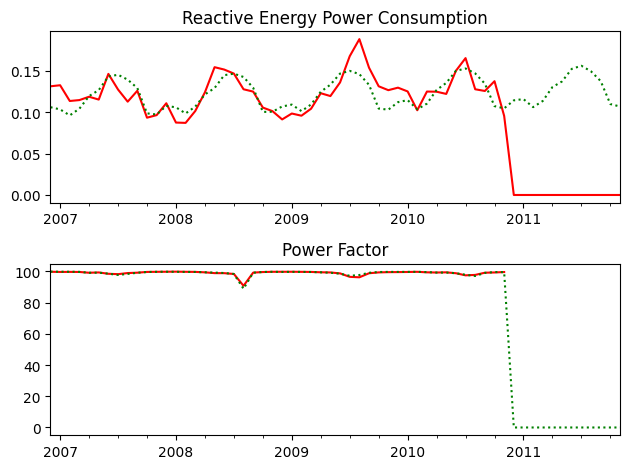

In [759]:
plt.subplot(2,1,1)
real_df_future[real_df_future.type=="Train"]["global_reactive_power"].plot(c="blue")
real_df_future[real_df_future.type=="Test"]["global_reactive_power"].plot(c="orange")
pred_df_future["global_reactive_power"].plot(c="green", linestyle="dotted")
plt.title("Reactive Energy Power Consumption")

plt.subplot(2,1,2)
real_df_future[real_df_future.type=="Train"]["power_factor"].plot(c="red")
real_df_future[real_df_future.type=="Test"]["power_factor"].plot(c="green", linestyle="dotted")
pred_df_future["power_factor"].plot(c="green", linestyle="dotted")
plt.title("Power Factor")
plt.tight_layout()


In [ ]:
1+1